# QC predictions from features

In [ ]:
import seaborn as sbn
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import pandas as pd
import sys
from pathlib import Path

project_dir = Path().resolve().parents[2]
results_dir = project_dir / Path("output/QC_prediction_from_features")


PosixPath('/home/nnieto/Nico/QC_project/QC')

## For each site

(25, 7)

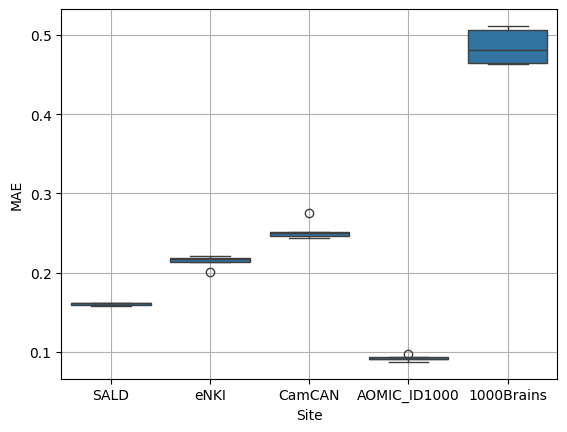

In [39]:

results = pd.read_csv(results_dir / "results_QC_agregated_single_site.csv")
results_2_plot = results[results["Model"] == "QC Test"]
sbn.boxplot(data=results_2_plot, x="Site", y="MAE")
plt.grid()
# %%
results_2_plot.shape


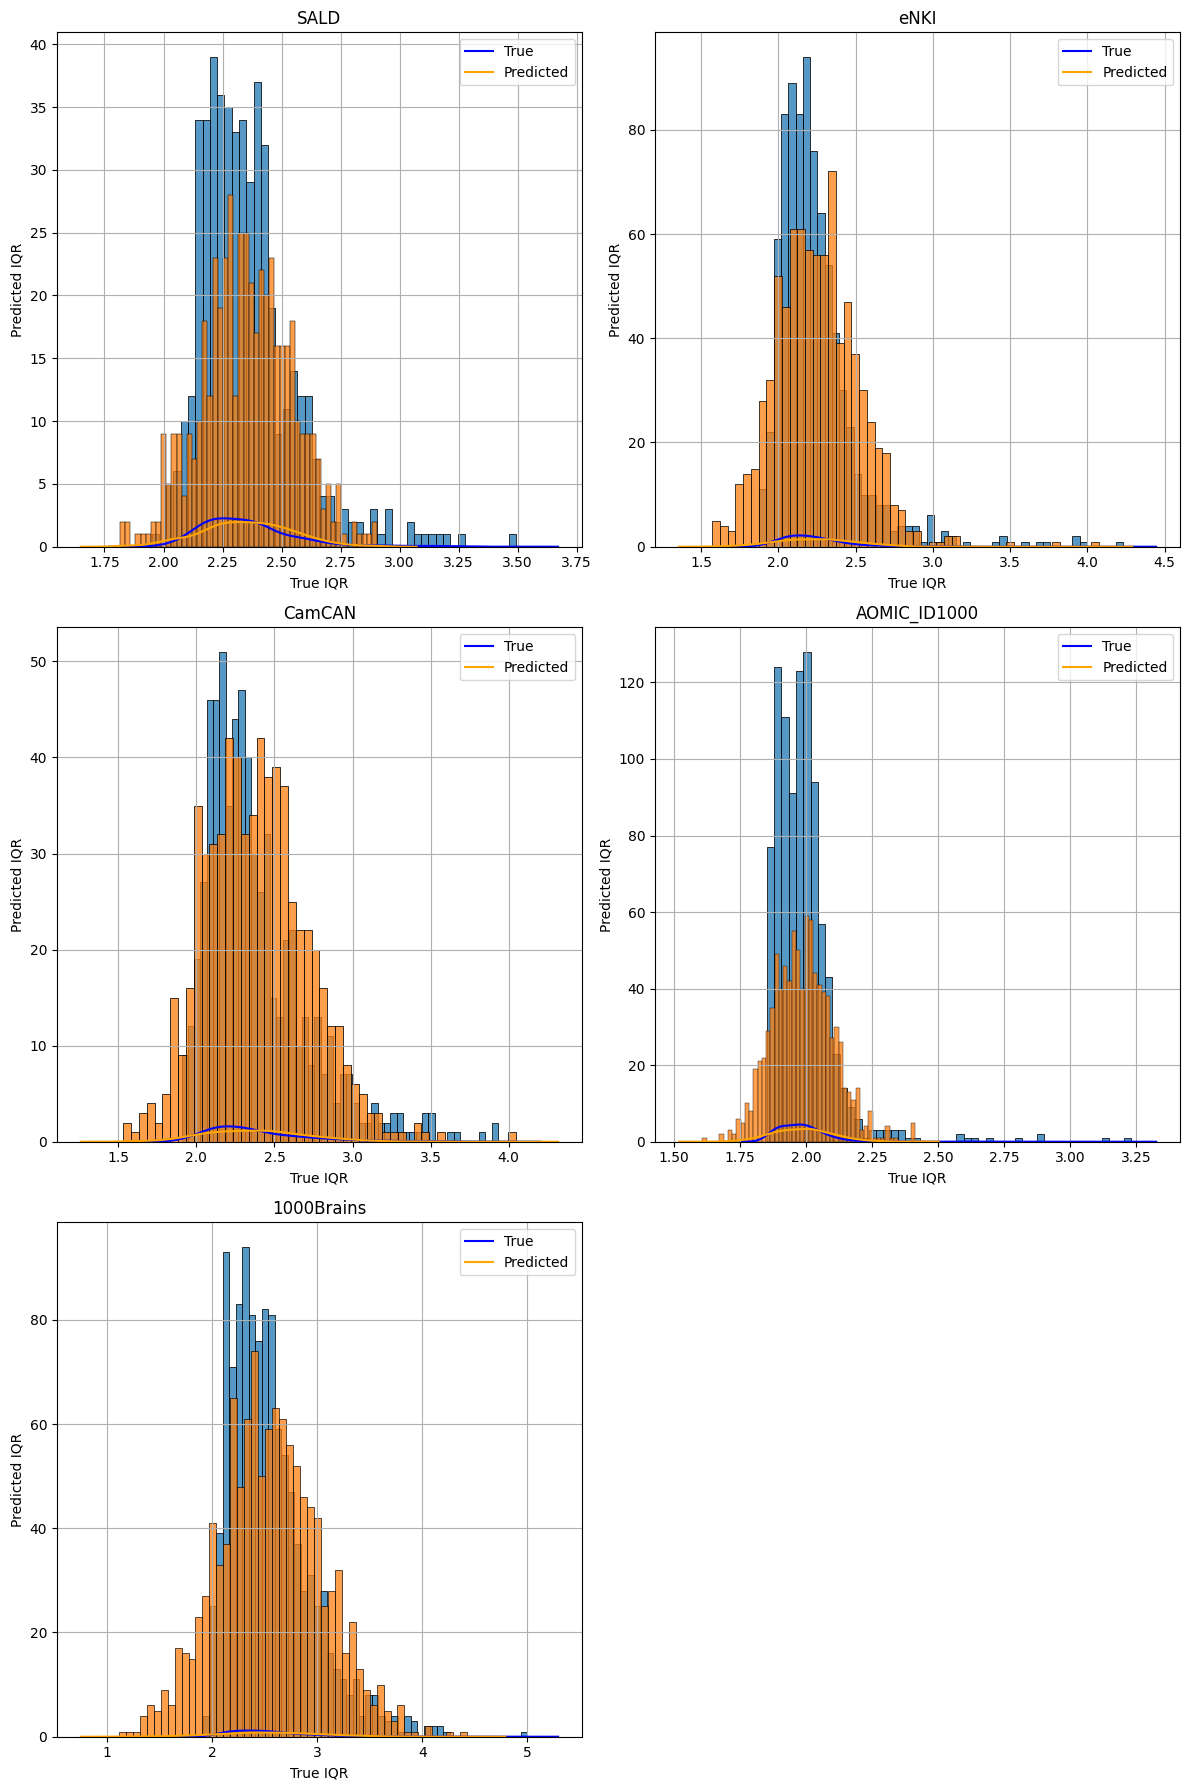

In [12]:
results_loop = pd.read_csv(results_dir / "results_QC_prediction_single_site.csv")


# %%
# Create a figure with subplots arranged in 2 columns and 3 rows
fig = plt.figure(figsize=(12, 18))
gs = GridSpec(3, 2, figure=fig)

# Iterate over sites and create subplots
for idx, site in enumerate(results_loop["Site"].unique()):
    ax = fig.add_subplot(gs[idx // 2, idx % 2])
    results_2_plot = results_loop[results_loop["Site"] == site]

    y_max = results_2_plot["y_true"].max()
    y_min = results_2_plot["y_true"].min()
    y_max = max(y_max, results_2_plot["y_pred"].max()) + 0.1
    y_min = min(y_min, results_2_plot["y_pred"].min()) - 0.1

    sbn.histplot(data=results_2_plot, x="y_true", ax=ax, bins=50)
    sbn.histplot(data=results_2_plot, x="y_pred", ax=ax, bins=50)
    sbn.kdeplot(data=results_2_plot, x="y_true", ax=ax, color="blue", label="True")
    sbn.kdeplot(
        data=results_2_plot, x="y_pred", ax=ax, color="orange", label="Predicted"
    )
    # ax.set_xlim([y_min, y_max])
    # ax.set_ylim([y_min, y_max])
    ax.set_xlabel("True IQR")
    ax.set_ylabel("Predicted IQR")
    ax.legend()
    ax.set_title(site)
    ax.grid()



# Adjust layout
plt.tight_layout()
plt.show()

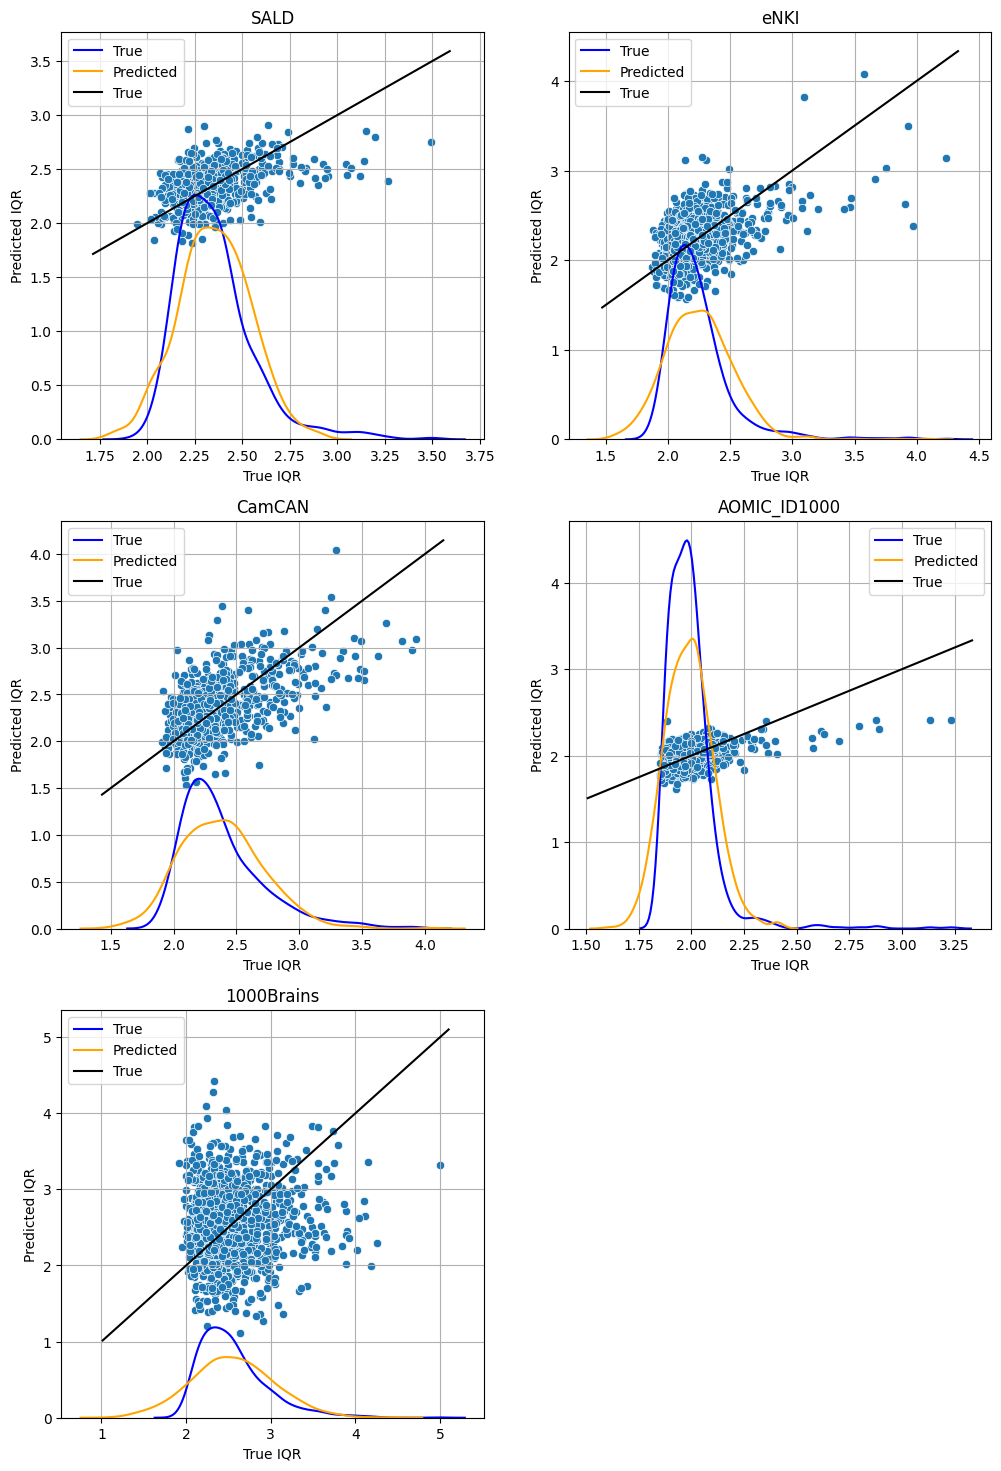

In [ ]:
# %%
# Create a figure with subplots arranged in 2 columns and 3 rows
fig = plt.figure(figsize=(12, 18))
gs = GridSpec(3, 2, figure=fig)

# Iterate over sites and create subplots
for idx, site in enumerate(results_loop["Site"].unique()):
    ax = fig.add_subplot(gs[idx // 2, idx % 2])
    results_2_plot = results_loop[results_loop["Site"] == site]

    y_max = results_2_plot["y_true"].max()
    y_min = results_2_plot["y_true"].min()
    y_max = max(y_max, results_2_plot["y_pred"].max()) + 0.1
    y_min = min(y_min, results_2_plot["y_pred"].min()) - 0.1

    sbn.scatterplot(data=results_2_plot, x="y_true", y="y_pred", ax=ax)
    sbn.kdeplot(data=results_2_plot, x="y_true", ax=ax, color="blue", label="True")
    sbn.kdeplot(
        data=results_2_plot, x="y_pred", ax=ax, color="orange", label="Predicted"
    )
    ax.plot([y_min, y_max], [y_min, y_max], color="black", label="True")

    ax.set_xlabel("True IQR")
    ax.set_ylabel("Predicted IQR")
    ax.legend()
    ax.set_title(site)
    ax.grid()

## Combined data

5.2267699259330485 -2.713286846896782
5.2267699259330485 -2.713286846896782
5.2267699259330485 -2.713286846896782
5.2267699259330485 -2.713286846896782
5.2267699259330485 -2.713286846896782


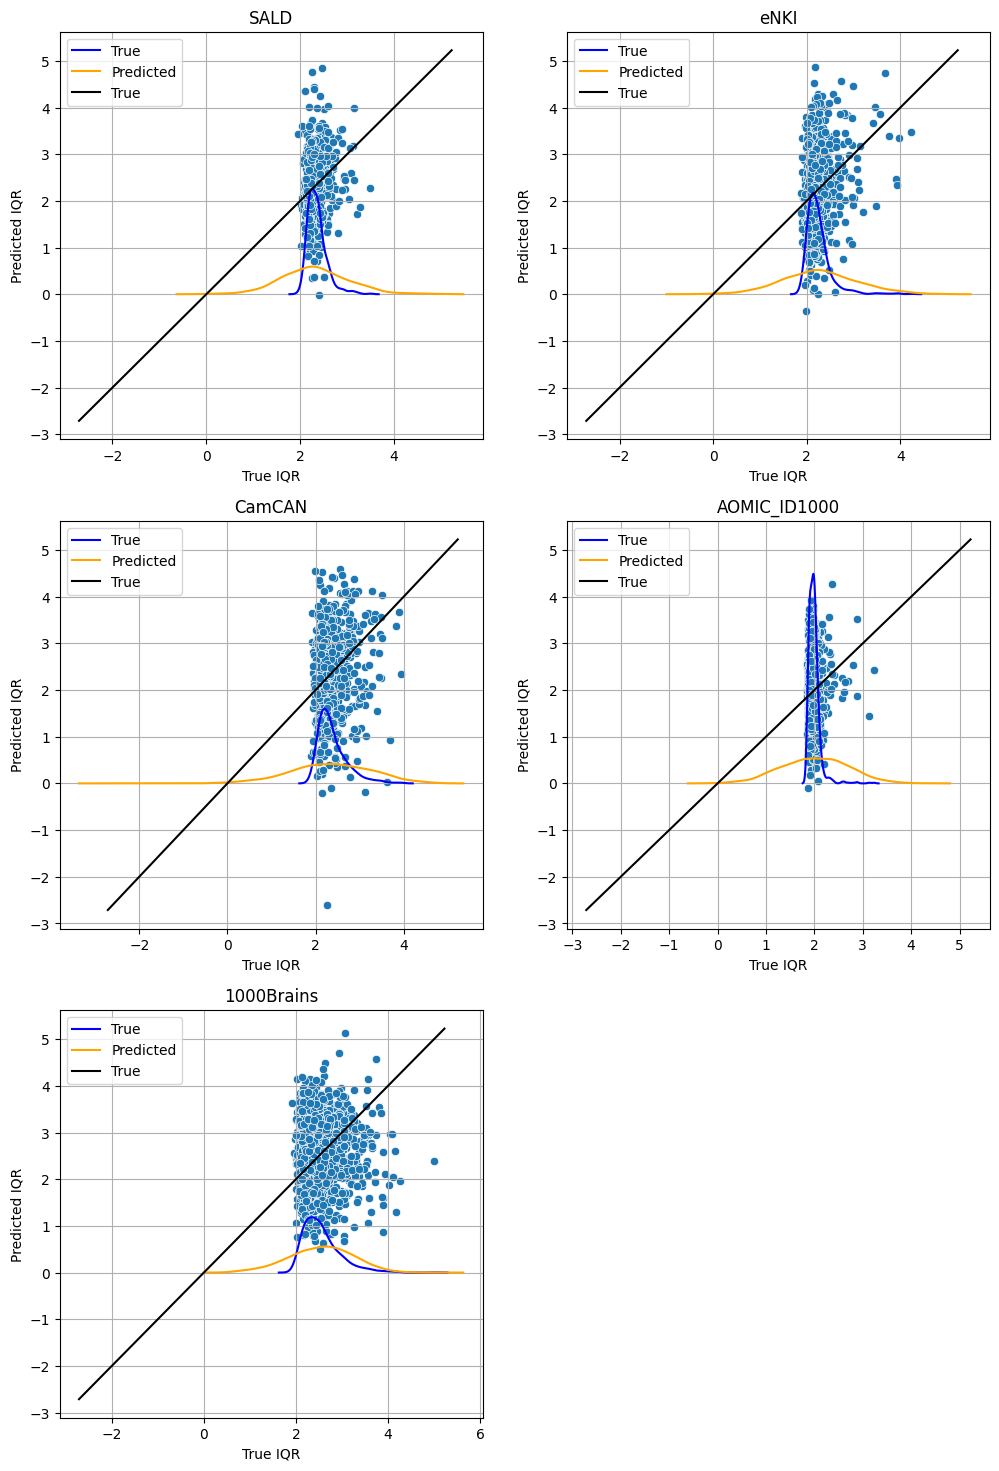

In [45]:
results_loop = pd.read_csv(results_dir / "results_QC_prediction_pooled_data.csv")
# %%
# Create a figure with subplots arranged in 2 columns and 3 rows
fig = plt.figure(figsize=(12, 18))
gs = GridSpec(3, 2, figure=fig)

# Iterate over sites and create subplots
for idx, site in enumerate(results_loop["Site"].unique()):
    ax = fig.add_subplot(gs[idx // 2, idx % 2])
    results_2_plot = results_loop[results_loop["Site"] == site]

    y_max = results_loop["y_true"].max()
    y_min = results_loop["y_true"].min()
    y_max = max(y_max, results_loop["y_pred"].max()) + 0.1
    y_min = min(y_min, results_loop["y_pred"].min()) - 0.1
    print(y_max, y_min)
    sbn.scatterplot(data=results_2_plot, x="y_true", y="y_pred", ax=ax)
    sbn.kdeplot(data=results_2_plot, x="y_true", ax=ax, color="blue", label="True")
    sbn.kdeplot(
        data=results_2_plot, x="y_pred", ax=ax, color="orange", label="Predicted"
    )
    ax.plot([y_min, y_max], [y_min, y_max], color="black", label="True")

    ax.set_xlabel("True IQR")
    ax.set_ylabel("Predicted IQR")
    ax.legend()
    ax.set_title(site)
    ax.grid()

# Dummys

(50, 8)

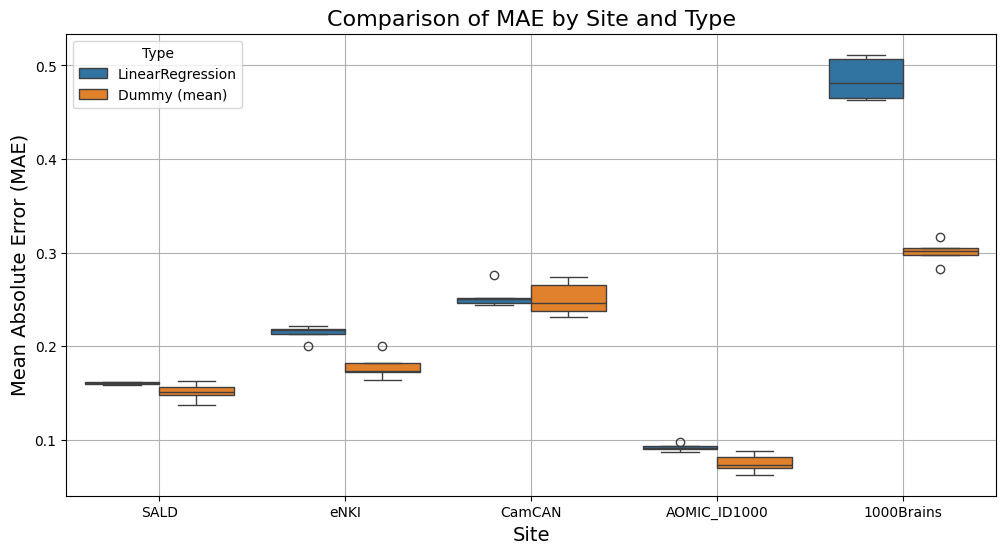

In [59]:

results_dummy = pd.read_csv(results_dir / "results_QC_agregated_single_site_dummy.csv")
results_dummy["Type"] = "Dummy (mean)"
results = pd.read_csv(results_dir / "results_QC_agregated_single_site.csv")
results["Type"] = "LinearRegression"
results = pd.concat([results, results_dummy], ignore_index=True)
plt.figure(figsize=(12, 6))
plt.title("Comparison of MAE by Site and Type", fontsize=16)
plt.xlabel("Site", fontsize=14)
plt.ylabel("Mean Absolute Error (MAE)", fontsize=14)
results_2_plot = results[results["Model"] == "QC Test"]
sbn.boxplot(data=results_2_plot, x="Site", y="MAE", hue="Type")

plt.grid()
# %%
results_2_plot.shape


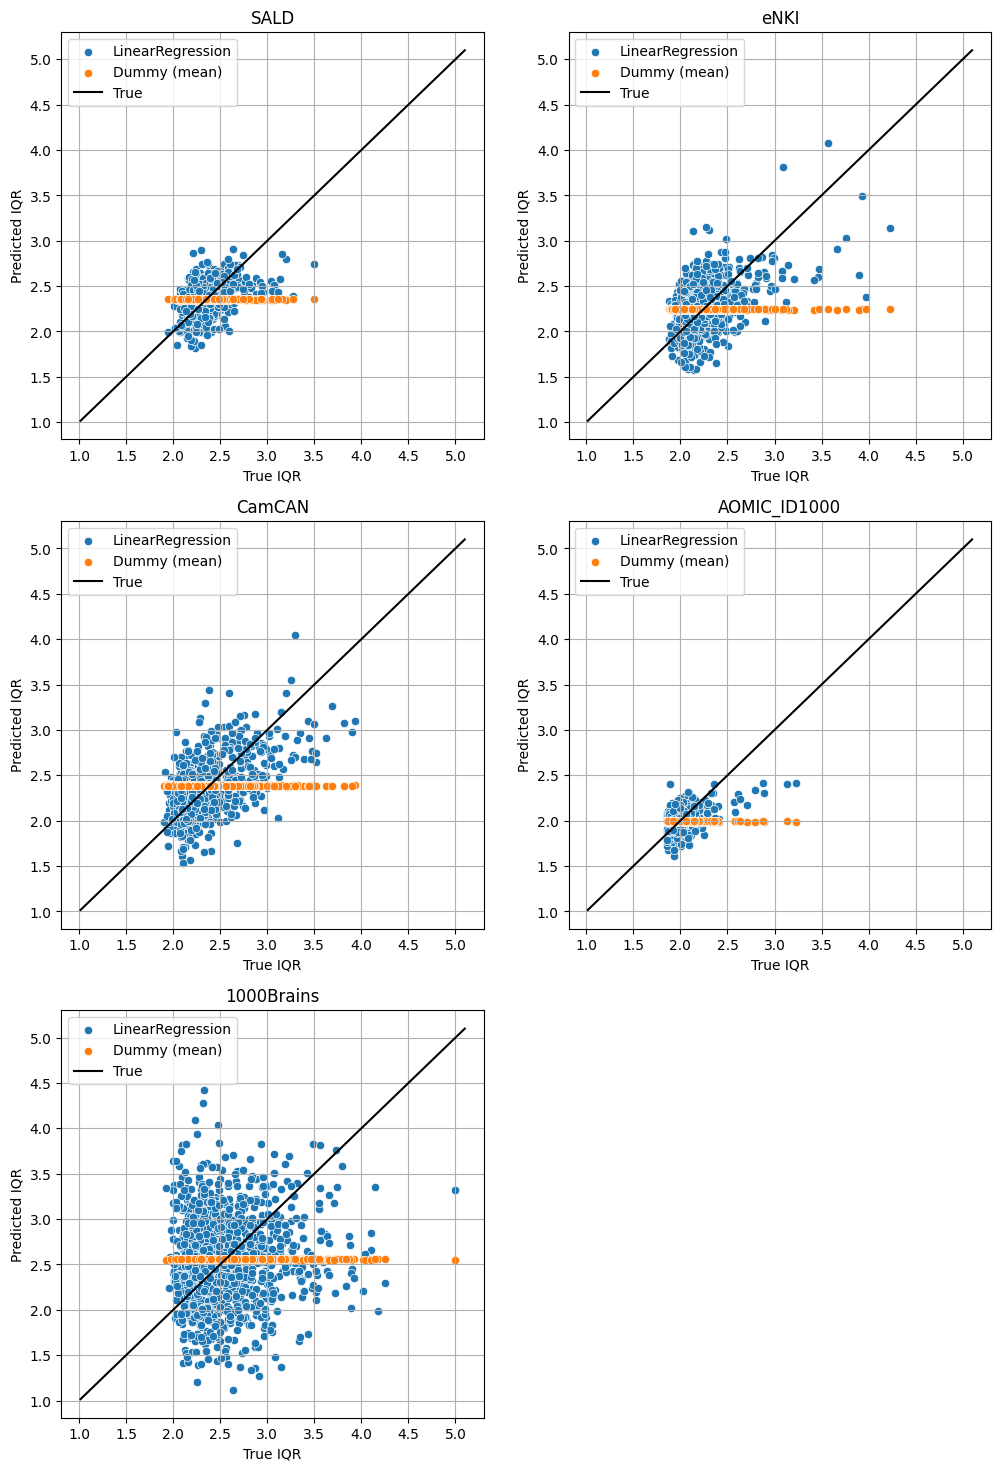

In [63]:
results_loop_dummy = pd.read_csv(results_dir / "results_QC_prediction_single_site_dummy.csv")
results_loop_dummy["Type"] = "Dummy (mean)"
results_loop = pd.read_csv(results_dir / "results_QC_prediction_single_site.csv")
results_loop["Type"] = "LinearRegression"
# %%
# Create a figure with subplots arranged in 2 columns and 3 rows
fig = plt.figure(figsize=(12, 18))
gs = GridSpec(3, 2, figure=fig)

# Iterate over sites and create subplots
for idx, site in enumerate(results_loop["Site"].unique()):
    ax = fig.add_subplot(gs[idx // 2, idx % 2])
    results_2_plot = results_loop[results_loop["Site"] == site]
    results_2_plot_dummy = results_loop_dummy[results_loop_dummy["Site"] == site]

    y_max = results_loop["y_true"].max()
    y_min = results_loop["y_true"].min()
    y_max = max(y_max, results_loop["y_pred"].max()) + 0.1
    y_min = min(y_min, results_loop["y_pred"].min()) - 0.1
    sbn.scatterplot(data=results_2_plot, x="y_true", y="y_pred", ax=ax, label="LinearRegression")
    sbn.scatterplot(data=results_2_plot_dummy, x="y_true", y="y_pred", ax=ax, label="Dummy (mean)")
    # sbn.kdeplot(data=results_2_plot, x="y_true", ax=ax, color="blue", label="True")
    # sbn.kdeplot(
    #     data=results_2_plot, x="y_pred", ax=ax, color="orange", label="Predicted"
    # )
    ax.plot([y_min, y_max], [y_min, y_max], color="black", label="True")

    ax.set_xlabel("True IQR")
    ax.set_ylabel("Predicted IQR")
    ax.legend()
    ax.set_title(site)
    ax.grid()

# Permutation score

In [ ]:
results_loop = pd.read_csv(results_dir / "results_QC_prediction_single_site_permutation_test.csv")


sbn.barplot(data=results_2_plot, x="Site", y="score", ax=ax)

# results_loop = pd.DataFrame(
#     {
#         "score": np.array(score_loop),
#         "permutation_score": np.array(permutation_loop),
#         "pvalue": np.array(pvalue_loop),
#         "Site": np.array(site_loop),
#     }
# )

FileNotFoundError: [Errno 2] No such file or directory: '/home/nnieto/Nico/QC_project/QC/output/QC_prediction_from_features/results_QC_prediction_single_site_permutation_test.csv'